In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
pd.options.display.max_rows = 1000

In [3]:
# Preprocessing Input data
data = pd.read_csv('covid_data.csv', low_memory = False)

In [4]:
pd.set_option('display.max_columns', None)
data.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.122,0.122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [5]:
data.corr()

/var/folders/3z/92v05ntj4hnc_xkhx758n9r40000gn/T/ipykernel_34727/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
total_cases,1.000000,0.671281,0.694447,0.936471,0.437488,0.452197,0.096539,0.011118,0.019262,0.117472,-0.002134,-0.002758,0.015249,0.427364,-0.009693,0.543343,-0.004175,0.180461,-0.086610,0.534580,-0.014550,0.857953,0.577009,0.095714,0.011806,0.088549,0.017699,0.044091,-0.017761,0.825825,0.825345,0.828205,0.837732,0.441283,0.475606,0.150732,0.146104,0.136012,0.029545,-0.018182,0.369438,-0.036961,-0.099538,-0.016361,0.040162,0.039862,0.038303,0.017034,-0.036995,-0.042432,0.002806,0.002295,-0.002528,0.032736,0.007190,0.020333,0.044100,0.614839,0.753939,0.093883,-0.022547,0.189320
new_cases,0.671281,1.000000,0.972716,0.705354,0.645232,0.632060,0.050278,0.055671,0.076962,0.071847,0.027721,0.038517,0.034652,0.566308,0.141977,0.708142,0.124544,0.371483,0.002864,0.663834,0.052044,0.446090,0.546949,0.070955,0.069460,0.082976,0.075642,0.177313,-0.015176,0.548923,0.566399,0.555657,0.458893,0.489268,0.509483,0.076909,0.070801,0.067100,-0.021554,0.020798,0.386417,-0.017362,0.017859,-0.014667,0.045548,0.046743,0.046336,0.020657,-0.035473,-0.045700,-0.000621,0.006337,0.001461,0.030484,0.020700,0.025256,0.046879,0.543217,0.327804,0.049482,0.083522,0.054802
new_cases_smoothed,0.694447,0.972716,1.000000,0.725595,0.639532,0.651794,0.052823,0.046911,0.079204,0.074411,0.024378,0.040885,0.029602,0.620019,0.158048,0.777611,0.140638,0.427288,0.008202,0.731456,0.060793,0.473537,0.555368,0.075653,0.065636,0.087318,0.077916,0.190999,-0.015997,0.565814,0.583026,0.572416,0.478058,0.485940,0.517919,0.079649,0.072849,0.068959,-0.019917,0.019853,0.392629,-0.018183,0.017451,-0.015012,0.046449,0.047625,0.047191,0.021031,-0.036229,-0.046634,-0.000529,0.006393,0.001512,0.031089,0.021028,0.025714,0.047844,0.557834,0.426156,0.040194,0.064064,0.071633
total_deaths,0.936471,0.705354,0.725595,1.000000,0.605267,0.624088,0.043576,0.002817,0.004377,0.127753,0.005605,0.010745,0.020758,0.572833,0.058951,0.633431,0.007659,0.333533,-0.068638,0.647501,-0.002721,0.773960,0.583425,0.030820,-0.008799,0.082783,-0.008990,0.029824,-0.018476,0.831558,0.853168,0.836030,0.749623,0.608914,0.637719,0.094357,0.104888,0.081868,-0.072804,0.015922,0.536702,-0.009995,-0.039652,-0.020222,0.034048,0.029642,0.027043,0.006654,-0.044505,-0.038895,0.012228,-0.007050,-0.002020,0.042935,-0.006477,0.016506,0.039991,0.712860,0.926142,0.280627,0.016416,0.303454
new_deaths,0.437488,0.645232,0.639532,0.605267,1.000000,0.976632,-0.032253,0.008870,0.008945,0.029044,0.065524,0.094107,0.027227,0.846498,0.304960,0.848142,0.198440,0.611968,0.093181,0.810465,0.062999,0.363663,0.508835,-0.033620,-0.014832,0.068595,-0.012627,0.123928,-0.019618,0.343123,0.384269,0.336009,0.168908,0

# A. Cleaning Data

## Select variables related to 'new_vaccinations_smoothed'  based on the correlation(over 0.5) of it

In [6]:
corr = data.corr()

/var/folders/3z/92v05ntj4hnc_xkhx758n9r40000gn/T/ipykernel_34727/1351907255.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


In [7]:
corr = corr['new_vaccinations_smoothed']
corr_var=corr>=0.5
newcases_corr = corr[corr_var]

In [8]:
filtered_columns = pd.DataFrame(newcases_corr[:,]).index

In [9]:
filtered_columns

Index(['new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'icu_patients', 'hosp_patients',
       'weekly_hosp_admissions', 'total_tests', 'new_tests_smoothed',
       'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'new_people_vaccinated_smoothed', 'population',
       'excess_mortality_cumulative_absolute'],
      dtype='object')

# Add `continent` and `date`, which have no correlation since they are categorical variables.

In [10]:
data = data[data.columns[data.columns.isin(filtered_columns | ['continent', 'date'])]]

/var/folders/3z/92v05ntj4hnc_xkhx758n9r40000gn/T/ipykernel_34727/2053250998.py:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  data = data[data.columns[data.columns.isin(filtered_columns | ['continent', 'date'])]]


In [11]:
data.head(5)

,continent,date,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,icu_patients,hosp_patients,weekly_hosp_admissions,total_tests,new_tests_smoothed,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,new_people_vaccinated_smoothed,population,excess_mortality_cumulative_absolute
0,Asia,2020-02-24,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0,NaN
1,Asia,2020-02-25,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0,NaN
2,Asia,2020-02-26,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0,NaN
3,Asia,2020-02-27,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0,NaN
4,Asia,2020-02-28,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0,NaN


## Drop the columns if it is less than the minimum thresh (60%)

In [12]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [13]:
missing_values_table(data)

Your selected dataframe has 20 columns.
There are 19 columns that have missing values.


,Missing Values,% of Total Values
excess_mortality_cumulative_absolute,230242,96.6
weekly_hosp_admissions,219059,92.0
icu_patients,206051,86.5
hosp_patients,202093,84.8
new_vaccinations,181954,76.4
people_fully_vaccinated,176011,73.9
people_vaccinated,173366,72.8
total_vaccinations,170363,71.5
total_tests,158847,66.7
new_tests_smoothed,134269,56.4


In [14]:
perc = 60.0 # N %
min_count =  int(((100-perc)/100)*data.shape[0] + 1)
data = data.dropna( axis=1, 
                thresh=min_count)

## Remove outliers

In [15]:
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

final_df=cap_data(data)

capping the  continent
capping the  date
capping the  new_cases
capping the  new_cases_smoothed
capping the  total_deaths
capping the  new_deaths
capping the  new_deaths_smoothed
capping the  new_tests_smoothed
capping the  new_vaccinations_smoothed
capping the  new_people_vaccinated_smoothed
capping the  population


/var/folders/3z/92v05ntj4hnc_xkhx758n9r40000gn/T/ipykernel_34727/2495983979.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
/var/folders/3z/92v05ntj4hnc_xkhx758n9r40000gn/T/ipykernel_34727/2495983979.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]


## Data type changes for `date` and one-hot encode for the categorical variables

In [16]:
final_df['date']= pd.to_datetime(final_df['date'])
final_df['year'] = final_df['date'].dt.year
final_df['month'] = final_df['date'].dt.month

In [17]:
final_df = final_df.drop(['date'], axis=1)

In [18]:
final_df['year'] = pd.Categorical(final_df['year'])
final_df['month'] = pd.Categorical(final_df['month'])

In [19]:
final_df.head(5)

,continent,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,new_tests_smoothed,new_vaccinations_smoothed,new_people_vaccinated_smoothed,population,year,month
0,Asia,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0,2020,2
1,Asia,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0,2020,2
2,Asia,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0,2020,2
3,Asia,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0,2020,2
4,Asia,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0,2020,2


In [20]:
# One-hot encode the data using pandas get_dummies
final_df = pd.get_dummies(final_df)

## Remove rows including NA 

In [21]:
final_df = final_df.dropna()

In [22]:
final_df.head(5)

,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,new_tests_smoothed,new_vaccinations_smoothed,new_people_vaccinated_smoothed,population,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,year_2020,year_2021,year_2022,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
712,353.0,631.571,7425.0,5.0,2.857,1301.0,12573.0,10807.0,41128772.0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
713,480.0,582.857,7432.0,7.0,3.429,1301.0,12847.0,11092.0,41128772.0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
714,733.0,571.143,7442.0,10.0,4.000,1301.0,13122.0,11376.0,41128772.0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
715,815.0,597.714,7454.0,12.0,5.286,1301.0,13311.0,11546.0,41128772.0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
716,811.0,622.857,7465.0,11.0,6.714,1301.0,13501.0,11716.0,41128772.0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0


In [23]:
final_df.shape

(64034, 30)

# B. Modeling 
# 1. RandomForest
## Let's use the RandomForest to find important features for `new_vaccinations_smoothed`

In [24]:
features = final_df

In [25]:
list(features.columns)

['new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'new_tests_smoothed',
 'new_vaccinations_smoothed',
 'new_people_vaccinated_smoothed',
 'population',
 'continent_Africa',
 'continent_Asia',
 'continent_Europe',
 'continent_North America',
 'continent_Oceania',
 'continent_South America',
 'year_2020',
 'year_2021',
 'year_2022',
 'month_1',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_9',
 'month_10',
 'month_11',
 'month_12']

In [26]:
# Use numpy to convert to arrays
# Labels are the values we want to predict
y = np.array(features['new_vaccinations_smoothed'])
# Remove the labels from the features
# axis 1 refers to the columns
x = features.drop(['new_vaccinations_smoothed', 'new_people_vaccinated_smoothed'], axis = 1)
#features = features.iloc[:, np.r_[0, 3:9]]

# Saving feature names for later use
feature_list = list(x.columns)
# Convert to numpy array
#features = np.array(x)

In [27]:
feature_list

['new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'new_tests_smoothed',
 'population',
 'continent_Africa',
 'continent_Asia',
 'continent_Europe',
 'continent_North America',
 'continent_Oceania',
 'continent_South America',
 'year_2020',
 'year_2021',
 'year_2022',
 'month_1',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_9',
 'month_10',
 'month_11',
 'month_12']

## Normalization

In [28]:
from sklearn.preprocessing import scale
x = scale(x)
y = scale(y)

/Users/BenAnderson/Library/Python/3.8/lib/python/site-packages/sklearn/preprocessing/_data.py:239: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


In [29]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.20)

In [30]:
from sklearn import set_config
from sklearn.ensemble import RandomForestRegressor

set_config(print_changed_only=False)
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
print(rfr)

rfr.fit(xtrain, ytrain)

score = rfr.score(xtrain, ytrain)
print("R-squared:", score)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='squared_error',
                      max_depth=None, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)
R-squared: 0.999004415931454


## After using 100 regression trees, we got 99 R-square, which seems like overfitting.
## Let's check error rate and prediction by the plot

In [31]:
from sklearn.metrics import mean_squared_error

ypred = rfr.predict(xtest)

mse = mean_squared_error(ytest, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

MSE:  0.007667661394789038
RMSE:  0.003833830697394519


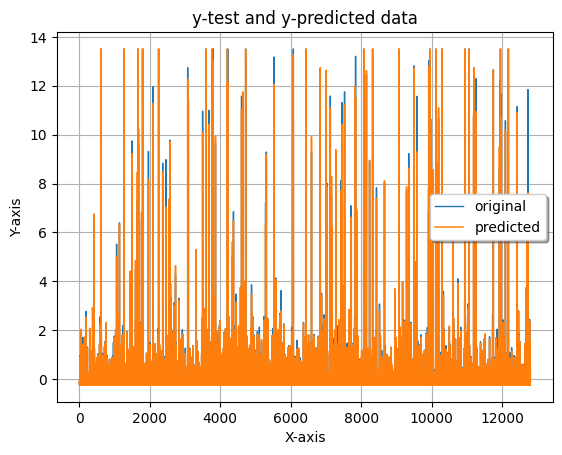

In [32]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, linewidth=1, label="original")
plt.plot(x_ax, ypred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

## Let's check important features for `new_vaccinations_smoothed`

In [33]:
rfr.feature_importances_

array([3.37627580e-03, 1.01596069e-02, 1.31467692e-01, 1.63096177e-02,
       1.69672009e-02, 1.09053560e-01, 6.83321305e-01, 2.87772367e-05,
       7.76440591e-04, 9.14890339e-05, 2.61471459e-04, 8.17431832e-07,
       2.22403533e-04, 2.71665161e-05, 1.52482216e-03, 1.66016293e-04,
       1.89604107e-03, 2.23712266e-03, 8.86109441e-04, 6.12143866e-03,
       1.42392800e-03, 3.06813054e-04, 8.66661914e-04, 2.67216780e-04,
       3.41880231e-03, 9.64609359e-04, 1.11355532e-03, 6.74303863e-03])

In [34]:
feature_list = np.asarray(feature_list)
feature_list

array(['new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'new_tests_smoothed', 'population',
       'continent_Africa', 'continent_Asia', 'continent_Europe',
       'continent_North America', 'continent_Oceania',
       'continent_South America', 'year_2020', 'year_2021', 'year_2022',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12'], dtype='<U23')

Text(0.5, 0, 'Random Forest Feature Importance')

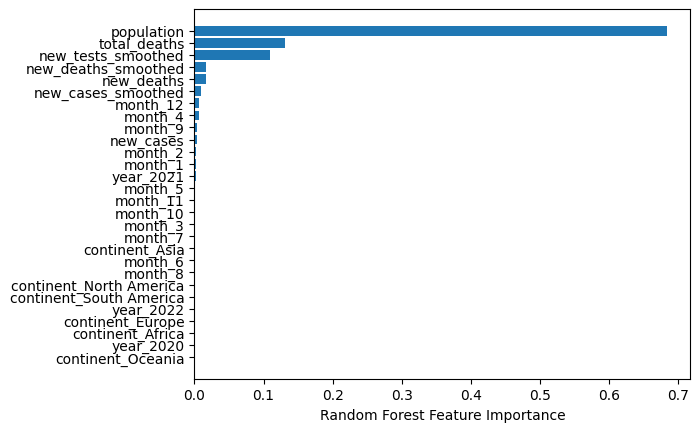

In [35]:
sorted_idx = rfr.feature_importances_.argsort()
plt.barh(feature_list[sorted_idx], rfr.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## `population`, `total_deaths`, `new_tests_smoothed` seems like strong predictors.

## Let's build the multiple linear regression by these predictors, since the randomforrest is overfitting

# 2. Multiple Linear regression

## Since we want to explore the relationship between vaccinations and death, we will add `new_deaths_smoothed` and `new_deaths`

In [36]:
X = final_df[["population", "total_deaths", "new_tests_smoothed", "new_deaths_smoothed", "new_deaths"]]
Y = final_df[["new_vaccinations_smoothed"]]

## Exploring features

Text(0, 0.5, 'new_vaccinations_smoothed')

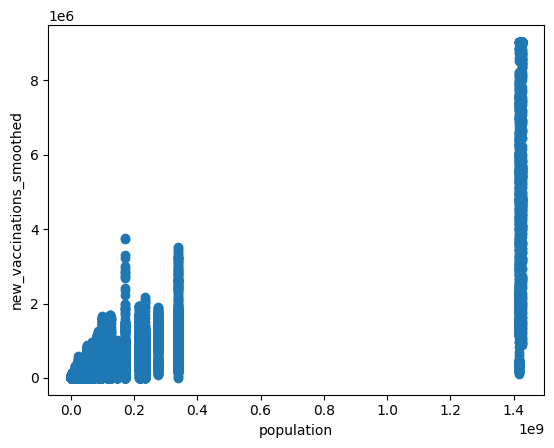

In [37]:
plt.scatter(X["population"],Y)
plt.xlabel("population")
plt.ylabel("new_vaccinations_smoothed")

## Big portion of the population got the vaccination, and low portion of it seems under-developed countries.

Text(0, 0.5, 'new_vaccinations_smoothed')

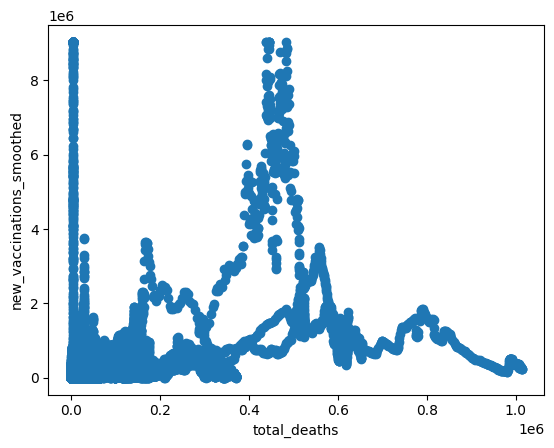

In [38]:
plt.scatter(X["total_deaths"],Y)
plt.xlabel("total_deaths")
plt.ylabel("new_vaccinations_smoothed")

## Around 500,000 `total_deaths` shows the highest new vaccinations

Text(0, 0.5, 'new_vaccinations_smoothed')

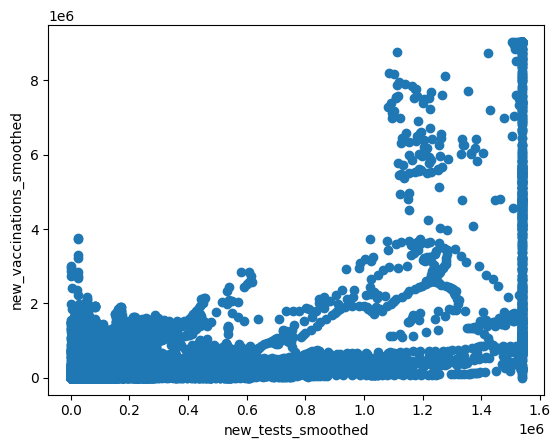

In [39]:
plt.scatter(X["new_tests_smoothed"],Y)
plt.xlabel("new_tests_smoothed")
plt.ylabel("new_vaccinations_smoothed")

## `new_tests_smoothed` shows the moderate positive relationship with `new_vaccinations_smoothed`

Text(0, 0.5, 'new_vaccinations_smoothed')

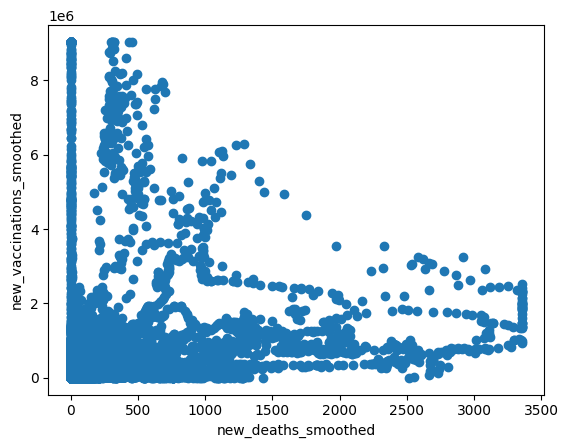

In [40]:
plt.scatter(X["new_deaths_smoothed"],Y)
plt.xlabel("new_deaths_smoothed")
plt.ylabel("new_vaccinations_smoothed")

## `new_deaths_smoothed` shows moderate negative correlation with `new_vaccinations_smoothed`

Text(0, 0.5, 'new_vaccinations_smoothed')

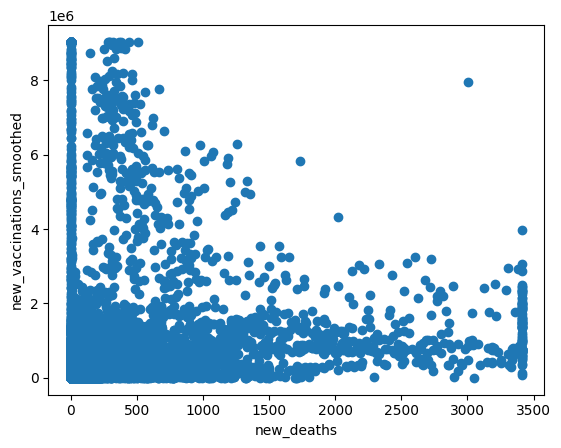

In [41]:
plt.scatter(X["new_deaths"],Y)
plt.xlabel("new_deaths")
plt.ylabel("new_vaccinations_smoothed")

## `new_deaths` also shows moderate negative correlation with `new_vaccinations_smoothed`

## Divide into train/test dataset

In [42]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

## Normalization

In [43]:
from sklearn import preprocessing
x_scaler = preprocessing.StandardScaler().fit(X_train)
X_train = x_scaler.transform(X_train)

y_scaler = preprocessing.StandardScaler().fit(y_train)
y_train = y_scaler.transform(y_train)

In [44]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                 normalize='deprecated', positive=False)

In [45]:
print (f"Model coeficients for features {X.columns} are {model.coef_}")

Model coeficients for features Index(['population', 'total_deaths', 'new_tests_smoothed',
       'new_deaths_smoothed', 'new_deaths'],
      dtype='object') are [[ 0.69517734 -0.05731736  0.25473374 -0.05436696 -0.02449107]]


## `population` shows a strong positive correlation with `new_vaccinations_smoothed`, and `new_tests_smoothed` shows a moderate positive correlation as we checked in the visualization. Especially, predictors related to deaths don’t have significant importance values to the number of vaccinations and also show negative coefficients in the linear regression, which conveys that deaths and vaccinations are not very related. 

Text(0, 0.5, 'new_vaccinations')

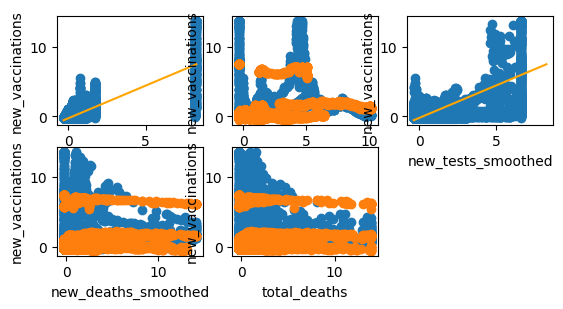

In [46]:
y_pred= model.predict(X_train)

plt.subplot(3, 3, 1)
plt.scatter(X_train[:, 0], y_train)
plt.plot([min(X_train[:, 0]), max(X_train[:, 0])], [min(y_pred), max(y_pred)], color="orange")
plt.xlabel("population")
plt.ylabel("new_vaccinations")

plt.subplot(3, 3, 2)
plt.scatter(X_train[:, 1], y_train)
plt.scatter(X_train[:, 1],y_pred)
plt.xlabel("total_deaths")
plt.ylabel("new_vaccinations")

plt.subplot(3, 3, 3)
plt.scatter(X_train[:, 2], y_train)
plt.plot([min(X_train[:, 2]), max(X_train[:, 0])], [min(y_pred), max(y_pred)], color="orange")
plt.xlabel("new_tests_smoothed")
plt.ylabel("new_vaccinations")

plt.subplot(3, 3, 4)
plt.scatter(X_train[:, 3], y_train)
plt.scatter(X_train[:, 3],y_pred)
plt.xlabel("new_deaths_smoothed")
plt.ylabel("new_vaccinations")

plt.subplot(3, 3, 5)
plt.scatter(X_train[:, 4], y_train)
plt.scatter(X_train[:, 4],y_pred)
plt.xlabel("total_deaths")
plt.ylabel("new_vaccinations")

## Model Testing: Testing data

In [47]:
X_test = x_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)
y_pred= model.predict(X_test)

In [48]:
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
pd.DataFrame([MSE, RMSE], index=['MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MSE,0.280112
RMSE,0.529256


In [49]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.7381732082533776

## R-squared of the multiple linear regression is around 73, which seems not overfitting. Since  predictors except `population` are not very strong, it is expectable.

In [50]:
y_pred

array([[-0.22489435],
       [-0.24764735],
       [-0.18585437],
       ...,
       [-0.24924537],
       [-0.21255502],
       [ 0.07228014]])

In [51]:
y_pred = y_scaler.inverse_transform(y_pred)
y_pred

array([[  7789.51873031],
       [ -7009.56793402],
       [ 33182.05238565],
       ...,
       [ -8048.96013954],
       [ 15815.31254708],
       [201078.86906705]])